<a href="https://colab.research.google.com/github/samho22/QTM350/blob/main/QTM350TricoloreFinalProjectAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Our Final Analysis**

Hello! This notebook will walk you through our final analysis after gathering all of our data. Reading through this notebok will show you how to import your data, create summary statistics, visualize your data, fit a linear regression model and conduct an ANOVA test.


### **Import the Data**


We will be importing two datasets that are in different formats, but have the same underlying data. One will be in a wide dataframe while the other will be a long dataframe. This is to ensure we can conduct thorough analysis on our collected data without being confined nor restricted by our dataformat

In [ ]:
from google.colab import files 
uploaded = files.upload()

In [ ]:
import io
dfAccuracyScoreswide = pd.read_csv(io.BytesIO(uploaded['Untitled spreadsheet - Sheet1.csv']))

In [ ]:
dfAccuracyScoreswide

,Languages,Slang Phrase 1,Formal Phrase 1,Slang Phrase 2,Formal Phrase 2
0,Korean,14.77,30.85,10.38,15.54
1,Simplified Mandarin,23.19,42.86,12.50,42.31
2,Tagalog,31.43,84.18,10.10,63.81
3,Hindi,4.29,42.16,18.64,43.08
4,Spanish(Mexico),67.74,67.76,16.33,52.94
5,French,57.14,67.16,58.33,62.91
6,German,95.81,94.21,49.55,15.92
7,Portuguese,52.17,66.09,42.20,67.80


In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving AccuracyScore - Sheet1.csv to AccuracyScore - Sheet1 (2).csv


In [ ]:
import io
dfAccuracyScoreslong = pd.read_csv(io.BytesIO(uploaded['AccuracyScore - Sheet1.csv']))

In [ ]:
dfAccuracyScoreslong

,Language,Phrase,Accuracy,LanguageCategory
0,Korean,formal,30.85,asian
1,Korean,slang,14.77,asian
2,Korean,formal,15.54,asian
3,Korean,slang,10.38,asian
4,Mandarin,formal,42.86,asian
5,Mandarin,slang,23.19,asian
6,Mandarin,formal,42.31,asian
7,Mandarin,slang,12.50,asian
8,Tagalog,formal,84.18,asian
9,Tagalog,slang,31.42,asian


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Creating Data Visualizations

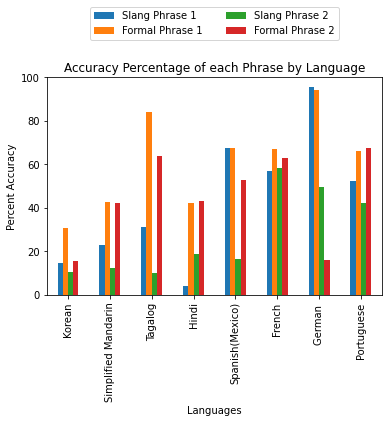

In [ ]:
dfAccuracyScoreswide.plot.bar(x="Languages")
plt.ylabel("Percent Accuracy")
plt.ylim([0, 100])
plt.title('Accuracy Percentage of each Phrase by Language')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=2)

Text(0.5, 1.0, 'Percent Accuracy of Each Language by Slang vs Formal Phrase')

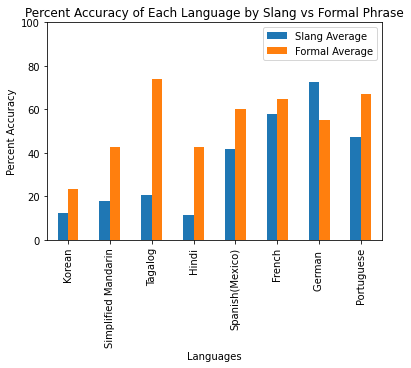

In [ ]:
newdf=dfAccuracyScoreswide
newdf["Slang Average"] = newdf[["Slang Phrase 1", 'Slang Phrase 2']].mean(axis=1)
newdf["Formal Average"]= newdf[["Formal Phrase 1 ", "Formal Phrase 2"]].mean(axis=1)

data2=newdf[["Languages","Slang Average","Formal Average"]]
data2
data2.plot.bar(x="Languages")
plt.ylabel("Percent Accuracy")
plt.ylim([0, 100])
plt.title('Percent Accuracy of Each Language by Slang vs Formal Phrase')

As seen by the two bar graphs above, we see a consistent pattern with AWS Translate having more accurate translations with formal phrases versus slang phrases. However, we do see an outlier with German's slang phrases being more accurate, on average, than the formal translations. However, due to German's language structure being grammatically closer to English's language structure, this outlier makes logical sense. 

### Analyzing Asian vs NonAsian Languages

In [ ]:
avna = dfAccuracyScoreslong.groupby(['Phrase', "LanguageCategory"]).mean().reset_index()

In [ ]:
avna['LanguagePhrase'] = avna["Phrase"].astype(str) +" " + avna["LanguageCategory"]

In [ ]:
avna

,Phrase,LanguageCategory,Accuracy,LanguagePhrase
0,formal,asian,45.59875,formal asian
1,formal,nonasian,61.84875,formal nonasian
2,slang,asian,15.66125,slang asian
3,slang,nonasian,54.90875,slang nonasian


Text(0.5, 1.0, 'Asian vs NonAsian Language Percent Accuracy')

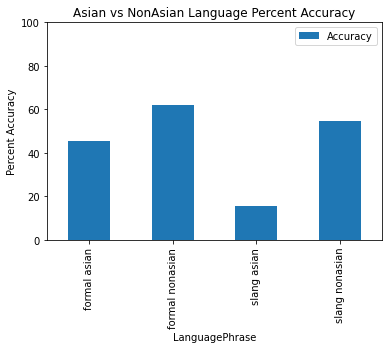

In [ ]:
avna.plot.bar(x="LanguagePhrase", y=['Accuracy'])
plt.ylabel("Percent Accuracy")
plt.ylim([0, 100])
plt.title("Asian vs NonAsian Language Percent Accuracy")

As hypothesized, asian languages have a lower accuracy translation rate than nonasian languages. Both formal and slang phrases of non asian languages scored higher than the asian translations of the same formal and slang phrases.

# ANOVA Test

# **Regression Analysis**

We will continue our analysis by conducting a Regression Analysis and analyzing the relationship between Language Category (asian vs nonasian) & Phrase (formal vs slang)

In [ ]:
import statsmodels.formula.api as smf

results = smf.ols('Accuracy ~ LanguageCategory+Phrase', data=dfAccuracyScoreslong).fit()
results.params

Intercept                       39.849375
LanguageCategory[T.nonasian]    27.748750
Phrase[T.slang]                -18.438750
dtype: float64

In [ ]:
results.tvalues

Intercept                       6.552061
LanguageCategory[T.nonasian]    3.951213
Phrase[T.slang]                -2.625539
dtype: float64

As we can see, nonasian languages are roughly 27.75% more accurate than asian languages when translated by AWS Translate. Additionally, we see that slang phrases are 18.44% less accurate than formal phrases when translated. This lines up with our initial hypothesis as previously stated. Both the coefficients are statistically significant at the 1% level (someone pls help clarify lol)

# **Survey Data**

Now let's take a look at the data we collected from our survey.

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Survey Language Score - Sheet1-2.csv to Survey Language Score - Sheet1-2.csv


In [ ]:
import io
dfsurvey = pd.read_csv(io.BytesIO(uploaded['Survey Language Score - Sheet1-2.csv']))
dfsurvey

,Language,Language Category,Formal Accuracy Score,Formal Fluency Score,Formal Language Score,Casual Accuracy Score,Casual Fluency Score,Casual Language Score
0,Portuguese,nonasian,4.000000,3.428571,7.428571,2.571429,2.142857,4.714286
1,French,nonasian,2.833333,1.666667,4.500000,3.000000,1.333333,4.333333
2,Hindi,asian,3.115385,2.615385,5.730769,2.038462,1.615385,3.653846
3,German,nonasian,3.000000,2.166667,5.166667,3.416667,3.583333,7.000000
4,Korean,asian,3.062500,2.625000,5.687500,2.125000,1.187500,3.312500
5,Spanish,nonasian,4.590909,3.636364,8.227273,2.863636,2.363636,5.227273
6,Mandarin,asian,2.875000,2.625000,5.500000,1.500000,1.500000,3.000000
7,Tagalog,asian,2.576923,2.134615,4.711538,1.884615,1.711538,3.596154


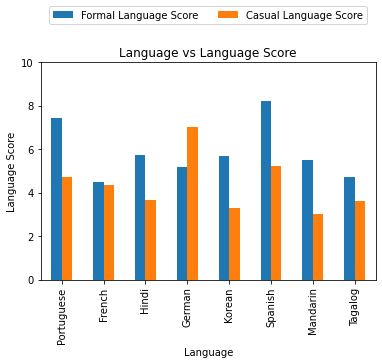

In [ ]:
dfsurvey.plot.bar(x="Language", y=["Formal Language Score", "Casual Language Score"])
plt.ylabel("Language Score")
plt.ylim([0, 10])
plt.title("Language vs Language Score")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=2)

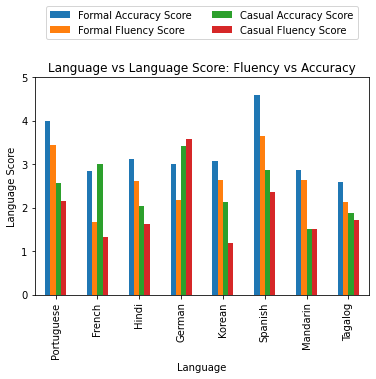

In [ ]:
dfsurvey.plot.bar(x="Language", y=["Formal Accuracy Score", "Formal Fluency Score", "Casual Accuracy Score", "Casual Fluency Score"])
plt.ylabel("Language Score")
plt.ylim([0, 5])
plt.title("Language vs Language Score: Fluency vs Accuracy")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=2)